# San Francisco Startup List

## Motivation
 * The startup market is a very interesting place for possibilities of ideation and creation to take place. I want to understand it better for the enjoyment of knowing what is happening there and how it works.

## Approach
 * First clean the dataset from the data I believe won't add any value to the questions I seek to get answered.
 * State the problems I face on this dataset where the information does not help me see through what I want.
 * Mold the dataset so the information I seek get answered and supply graphics with those answer to make clear my desired understanding.

## Process

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
PATH = "Dataset/san-francisco-based-startups.zip"

In [19]:
df = pd.read_csv(PATH)

In [20]:
df.head(10)

,name,email,product_desc,high_concept,location,market1,market2,market3
0,Delight,http://delight.io,Delight enlightens developers and designers on...,1 line of code to capture user interaction on ...,San Francisco,User Testing,Usability,Mobile Analytics
1,AnyRoad,http://anyroad.com,AnyRoad is the leader in enterprise experience...,The leader in enterprise experience management.,San Francisco,SaaS,Enterprise Software,Experience Design
2,MESA Ventures,http://www.mesa.vc,MESA Ventures is an early stage venture capita...,Consumer-focused venture capital,New York City,NaN,NaN,NaN
3,Code for America,http://codeforamerica.org,The CfA Accelerator is an early stage startup ...,Helping government work better with the people...,San Francisco,Open Source,Governments,Nonprofits
4,Zipongo,http://www.zipongo.com,Free: Web & Mobile shopping list on healthy GO...,Prescription for Healthy Living (Personalized ...,San Francisco,Mobile,Enterprise Software,Food and Beverages
5,FOBO,http://fobo.net,"""FOBO Launches In San Francisco To Become The ...","The fastest, easiest way to sell your electronics",San Francisco,Mobile,Marketplaces,Local
6,Upside,http://www.upsideadvisor.com,Upside helps registered investment advisors be...,Upside helps financial advisors beat the “robo...,San Francisco,Financial Services,Investment Management,Personal Finance
7,Whistle,http://www.whistle.com,Whistle is the world's first technology compan...,"Improving the lives of pets, as they do ours.",San Francisco,Health Care,Consumer Electronics,Pets
8,Kinderloop,http://www.kinderloop.com/?utm_source=Angelist...,"A web, and mobile application that brings the ...",Beautifully simple early childhood reporting!,San Francisco,Parenting,Kids,K-12 Education
9,Fresh,http://www.freshvc.com,Fresh is a venture capital firm focused on inv...,We invest in companies that make people's live...,San Francisco,Enterprise Software,Marketplaces,Developer Tools


## Cleaning
 * Drop email, it does not serve any purpose.
 * If one has market1, market2 or market3 empty, get rid of that row.

## Problem 
 * Which markets are the most competitive ones, there is more people creating products for that.
     * Separate all unique values, create categories among those.
     * Start easy just do the ones with the most repetitions, then go deeper.
     * See market by market
 * Which market is the one with the lowest competition.
     * See all the ones with unique values, how many are there, could they fit in any categorie.
 * Which location has the most amount of startups.
     * Datapoint x Location

---

## Step1 - Cleaning

### Getting rid of the email column

In [21]:
df = df.drop('email', 1)

In [24]:
df.head()

,name,product_desc,high_concept,location,market1,market2,market3
0,Delight,Delight enlightens developers and designers on...,1 line of code to capture user interaction on ...,San Francisco,User Testing,Usability,Mobile Analytics
1,AnyRoad,AnyRoad is the leader in enterprise experience...,The leader in enterprise experience management.,San Francisco,SaaS,Enterprise Software,Experience Design
2,MESA Ventures,MESA Ventures is an early stage venture capita...,Consumer-focused venture capital,New York City,NaN,NaN,NaN
3,Code for America,The CfA Accelerator is an early stage startup ...,Helping government work better with the people...,San Francisco,Open Source,Governments,Nonprofits
4,Zipongo,Free: Web & Mobile shopping list on healthy GO...,Prescription for Healthy Living (Personalized ...,San Francisco,Mobile,Enterprise Software,Food and Beverages


In [25]:
len(df)

1044

### With the objective of getting rid of the NaN values I found plenty of options to achieve this but I don't know which approach is better so given that this step is been taken to improve the dataset, I will decide on the approach that damages less the data integrity.
 * Geting rid of rows that have any NaN value.
 * Get rid of the rows where all of the values are NaN.
 * Delete only for rows that have at least two NaN values.

In [26]:
# No more NaN anywhere
df_bye_NaN = df.dropna()

In [28]:
len(df_bye_NaN)

834

In [32]:
market_df = df.loc[:, ['market1', 'market2', 'market3']]
df_bye_lack_of_data = market_df.dropna(how='all') 

In [33]:
len(df_bye_lack_of_data)

1012

In [37]:
kind_of_clean_df = market_df.dropna(thresh=2) 

In [38]:
len(kind_of_clean_df)

956

### Conclusion
 * For this particular study keeping a column that was never going to be used was a good idea.
 * I decided to clean NaN, even though you lose 210 datapoints, I think that because of the nature of this project it doesn't matter.

---

## Step2 - Problem set up

 * Which markets are the most competitive ones, there is more people creating products for that.
     * Separate all unique values, create categories among those.
     * Start easy just do the ones with the most repetitions, then go deeper.
     * See market by market

In [41]:
df_bye_NaN.head()

,name,product_desc,high_concept,location,market1,market2,market3
0,Delight,Delight enlightens developers and designers on...,1 line of code to capture user interaction on ...,San Francisco,User Testing,Usability,Mobile Analytics
1,AnyRoad,AnyRoad is the leader in enterprise experience...,The leader in enterprise experience management.,San Francisco,SaaS,Enterprise Software,Experience Design
3,Code for America,The CfA Accelerator is an early stage startup ...,Helping government work better with the people...,San Francisco,Open Source,Governments,Nonprofits
4,Zipongo,Free: Web & Mobile shopping list on healthy GO...,Prescription for Healthy Living (Personalized ...,San Francisco,Mobile,Enterprise Software,Food and Beverages
5,FOBO,"""FOBO Launches In San Francisco To Become The ...","The fastest, easiest way to sell your electronics",San Francisco,Mobile,Marketplaces,Local


In [87]:
len(set(df_bye_NaN['market1']))
# set(df_bye_NaN['market1'])

116

In [84]:
len(set(df_bye_NaN['market2']))
# set(df_bye_NaN['market2'])

204

In [85]:
len(set(df_bye_NaN['market3']))
# set(df_bye_NaN['market3'])

314

In [95]:
total_unique_markets = len(set(df_bye_NaN['market3'])) + len(set(df_bye_NaN['market2'])) + len(set(df_bye_NaN['market1']))
total_unique_markets

634

In [96]:
market1_items_counts = df['market1'].value_counts(sort=False)
market1_top = market1_items_counts.loc[[market1_items_counts.idxmax()]]
value, count = market1_top.index[0], market1_top.iat[0]
value, count

('Mobile', 185)

_To make this easier I will make a single column with all markets. Get the top 20 most repeated with their respective counts_

In [97]:
market1_df = df_bye_NaN['market1']
market2_df = df_bye_NaN['market2']
market3_df = df_bye_NaN['market3']
market_frames = [market1_df, market2_df, market3_df]
market_df = pd.concat(market_frames)

In [98]:
market_df

0                             User Testing
1                                     SaaS
3                              Open Source
4                                   Mobile
5                                   Mobile
6                       Financial Services
7                              Health Care
8                                Parenting
9                      Enterprise Software
10                                Payments
12                       Consumer Internet
13                               Analytics
14                                    SaaS
15                     Enterprise Software
16                        Loyalty Programs
17                                Hardware
19                              E-Commerce
20                                  Mobile
22                                Families
24                     Enterprise Software
26                              E-Commerce
27                  Social Media Marketing
29      Health Care Information Technology
30         

#### Make a dataframe with all possible market values, and make a count column to manage this step and the next one.

#### Extract data that can be used for analysis
 * From the three market columns get the top 20 most repeated values
 * Get how many unique values there are

In [113]:
market_20_most_popular = market1_df.value_counts().head(20)
type(market_20_most_popular)
market_20_most_popular

Mobile                 172
SaaS                   104
E-Commerce              53
Digital Media           31
Enterprise Software     31
Health Care             27
Hardware                26
Marketplaces            25
Social Media            25
Financial Services      25
Education               24
Consumer Internet       19
Analytics               14
Food and Beverages      13
Advertising             11
Real Estate             10
B2B                      8
Cloud Computing          8
Music                    7
Online Travel            7
Name: market1, dtype: int64

In [117]:
sum_20_popular_markets_datapoints = market_20_most_popular[0:20].sum()
sum_20_popular_markets_datapoints


640

In [116]:
software_num = 172 + 104 + 53 + 31 + 31 + 25 + 25 + 19 + 14 + 8 + 8 + 7
engineering_num = 26
health_num = 27
finances_num = 25
education_num = 24
food_num = 13
advertising_num = 11
music_num = 7
realstate_num = 10

#### Next steps:
 * Think of how to make the categorisation
 * How representative of the total amount of startups are the 20
   most popular startups.
 * Make categories that condense better the 20 most popular markets

__Current Knowledge:__
 * Datapoints = 2502
 * total_unique_markets = 634
 * sum_20_popular_markets_datapoints = 640

#### Categorization
 * Software: {Mobile, SaaS, E-Commerce, Digital Media, Enterprise Software, Marketplaces, Social Media, Consumer Internet, Analytics, B2B, Cloud Computing, Online Travel}
 * Engineering: {Hardware}
 * Health: {Health Care}
 * Finances: {Financial Services}
 * Education: {Education}
 * Food: {Food and Beverages}
 * Advertising: {Advertising}
 * Music: {Music}
 * RealState: {Real Estate}

In [110]:
# Make Dataframe with categorization 
# Get to another dataframe that has categories with total amount of 

In [119]:
# Three columns: Category, Num Population at it, Porcentage of Population
categories_data = [('Software', software_num, software_num/sum_20_popular_markets_datapoints),
                   ('Engineering', engineering_num, engineering_num/sum_20_popular_markets_datapoints),
                   ('Health', health_num, health_num/sum_20_popular_markets_datapoints),
                   ('Finances', finances_num, finances_num/sum_20_popular_markets_datapoints),
                   ('Education', education_num, education_num/sum_20_popular_markets_datapoints),
                   ('Food', food_num, food_num/sum_20_popular_markets_datapoints),
                   ('Advertising', advertising_num, advertising_num/sum_20_popular_markets_datapoints),
                   ('Music', music_num, music_num/sum_20_popular_markets_datapoints),
                   ('RealState', realstate_num, realstate_num/sum_20_popular_markets_datapoints)]
labels = ['Categories', 'DataPoints', 'Percentage of Total']
categories_df = pd.DataFrame.from_records(categories_data, columns=labels)

In [122]:
categories_df

,Categories,DataPoints,Percentage of Total
0,Software,497,0.776563
1,Engineering,26,0.040625
2,Health,27,0.042188
3,Finances,25,0.039062
4,Education,24,0.037500
5,Food,13,0.020313
6,Advertising,11,0.017188
7,Music,7,0.010937
8,RealState,10,0.015625


In [124]:
import seaborn as sns
# import matplotlib.pyplot as plt

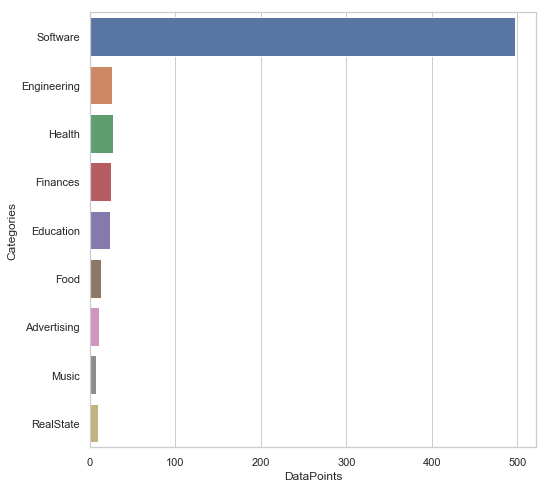

In [126]:
plt.subplots(figsize = (8 , 8))
sns.barplot(y=categories_df['Categories'], x=categories_df['DataPoints'])

### Conclusion
 * The market of startups is mainly made out of Software. 
 * I make the conclusion if a 1000 startup gets made probably around 70% of them will be software.